# Example aplication to 1D Navier equation using Julia
A simple implementation of the Finite Element Method for the resolution of the differential equation

$$
u_{,xx}(x) + f(x) = 0
$$

using a notation similar to Chapter One from the book: The Finite Element Method by Thomas J. R. Hughes.

**under construction** errors and suggestions &rightarrow; [www.fing.edu.uy/~jorgepz](https://www.fing.edu.uy/~jorgepz/)

## Physical interpretation of the equation
Let us consider a truss or unidimensional solid with length $\ell$, submitted to volume load $b(x)$, $u(x)$ is the displacement of each particle, $u_{,x}$ is the axial deformation and $E(x)\times u_{,x}(x)$ is the internal stress at each section located at $x$. The equilibrium equation can be obtained considering a differential of the solid:

$$
\frac{\partial}{\partial x} \left( E(x) u_{,x}(x) \right) + b(x) = 0.
$$

where $b$ is a force per unit of length, such as a unidimensional density.

Let us consider for this example that $E$ is uniform in the domain $[0,\ell]$, and E(x)=E. Then if the equation is divided by $E$ we obtain:

$$
u_{,xx}(x) + f(x) = 0.
$$

where $f(x) = \frac{b(x)}{E}$. Moreover $b(x)$ is a volume force per length volume. Let us consider the self weight: $b(x)=\rho(x) g A(x)$, where $A(x)$ is the area of the cross section.

In [31]:
#using Pkg
#Pkg.add("PyPlot")
using PyPlot
using LinearAlgebra

## Input
Let as consider a steel truss element submitted to gravity load (in vertical position). At $x=0$ the displacement  is fixed thus $u(x)=0$ and in all the domain $b(x) = \rho g A(x)$.

In [32]:
E   = 210e9 ;
rho = 7850  ;
g   = 9.81  ;
l   = 1     ;

nelems = 20 ;
nnodes = nelems + 1;

lelem = l / nelems ;

fixdofs = [ 1 ] ;
totdofs = 1:(nnodes) ;
fredofs = setdiff( totdofs, fixdofs );
Nodes   = lelem * (0:nelems) ;
loadsVector = vec( zeros( nnodes, 1 ) );
Areas = vec( ones(nelems,1) ) ;

## Analysis
System matrix and independent term vector assembly.

In [33]:
using SparseArrays
KG    = spzeros( nnodes, nnodes)
Kbase = [ 1 -1 ; -1 1 ]
FG = loadsVector;

for i in 1:nelems
  elemdofs = [i, i+1]
  A = Areas[i]
  KG[elemdofs, elemdofs ] += E*A/lelem * Kbase ;
  FG[elemdofs]            += rho*g*A*lelem * [ 0.5, 0.5]
end


[1, 2]
[1925.2125, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2, 3]
[1925.2125, 3850.425, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[3, 4]
[1925.2125, 3850.425, 3850.425, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4, 5]
[1925.2125, 3850.425, 3850.425, 3850.425, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[5, 6]
[1925.2125, 3850.425, 3850.425, 3850.425, 3850.425, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[6, 7]
[1925.2125, 3850.425, 3850.425, 3850.425, 3850.425, 3850.425, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[7, 8]
[1925.2125, 3850.425, 3850.425, 3850.425, 3850.425, 3850.425, 3850.425, 1925.2125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[8, 9]
[1925.2125, 3

Boundary conditions and system resolution.

In [34]:
Kliblib = KG[fredofs,fredofs ];
print(Array(Kliblib))
Flib    = FG[fredofs];

u = Kliblib \ Flib ;
UG = vec( zeros( nnodes,1));
UG[fredofs] = u;
println(" full displacements vector: ", UG)


[8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -4.2e12 8.4e12 -4.2e12 0.0 0.0 0.0 0.0 0.0 0.0 

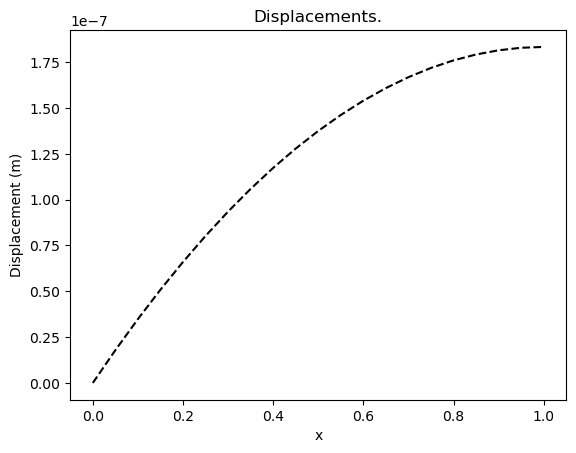

PyObject Text(0.5, 1, 'Displacements.')

In [35]:
plot(Nodes,UG, color="black", linewidth=1.5, linestyle="--")
xlabel("x")
ylabel("Displacement (m)")
title("Displacements.")
